<a href="https://colab.research.google.com/github/farhnsaptr/DIF62130_B_25_2311532018/blob/main/Praktikum5/PCA_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Principal Component Analysis)
Principal Component Analysis (PCA) adalah sebuah teknik dalam statistik dan pembelajaran mesin yang digunakan untuk mereduksi dimensi data tanpa kehilangan terlalu banyak informasi penting. PCA bekerja dengan cara mengubah data berdimensi tinggi menjadi sejumlah komponen utama (principal components) yang saling ortogonal dan merepresentasikan variasi terbesar dalam data. Komponen utama ini dihasilkan dari kombinasi linier fitur-fitur asli, dengan tujuan agar komponen pertama menangkap variasi paling besar, disusul komponen berikutnya dengan variasi terbesar kedua, dan seterusnya. Dengan demikian, PCA membantu menyederhanakan data kompleks, mempercepat pemrosesan, dan mempermudah visualisasi, terutama dalam analisis eksploratif atau sebagai tahap pra-pemrosesan dalam model pembelajaran mesin.


Algoritma PCA bekerja dengan terlebih dahulu menstandarkan data agar setiap fitur memiliki rata-rata nol dan variansi satu, sehingga perbedaan skala antar fitur tidak mempengaruhi hasil. Setelah itu, algoritma menghitung matriks kovarians untuk mengetahui hubungan antar fitur. Dari matriks kovarians ini, dihitunglah eigenvalue dan eigenvector, di mana eigenvector menunjukkan arah komponen utama dan eigenvalue menunjukkan seberapa besar variasi data yang dijelaskan oleh masing-masing komponen. Kemudian, komponen utama dipilih berdasarkan eigenvalue terbesar, karena komponen tersebut menangkap variasi terbesar dalam data. Langkah terakhir adalah memproyeksikan data asli ke ruang baru yang dibentuk oleh komponen-komponen utama tersebut, sehingga menghasilkan representasi data yang lebih sederhana namun tetap mempertahankan informasi yang paling penting.


Pada praktikum kali ini, kita akan menerapkan algoritma PCA dalam dataset iris yang disediakan oleh scikit-learn (dan juga algoritma PCA yang disediakan oleh scikit-learn)

# Import data yang dibutuhkan

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Import dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

# Exploratory Data singkat

In [3]:
print("Dataset shape:", X.shape)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Target names:", target_names)
print("Feature names:", feature_names)

Dataset shape: (150, 4)
Number of samples: 150
Number of features: 4
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
df = pd.DataFrame(X, columns=feature_names)
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# Visualisasi Data sebelum diolah dengan PCA:

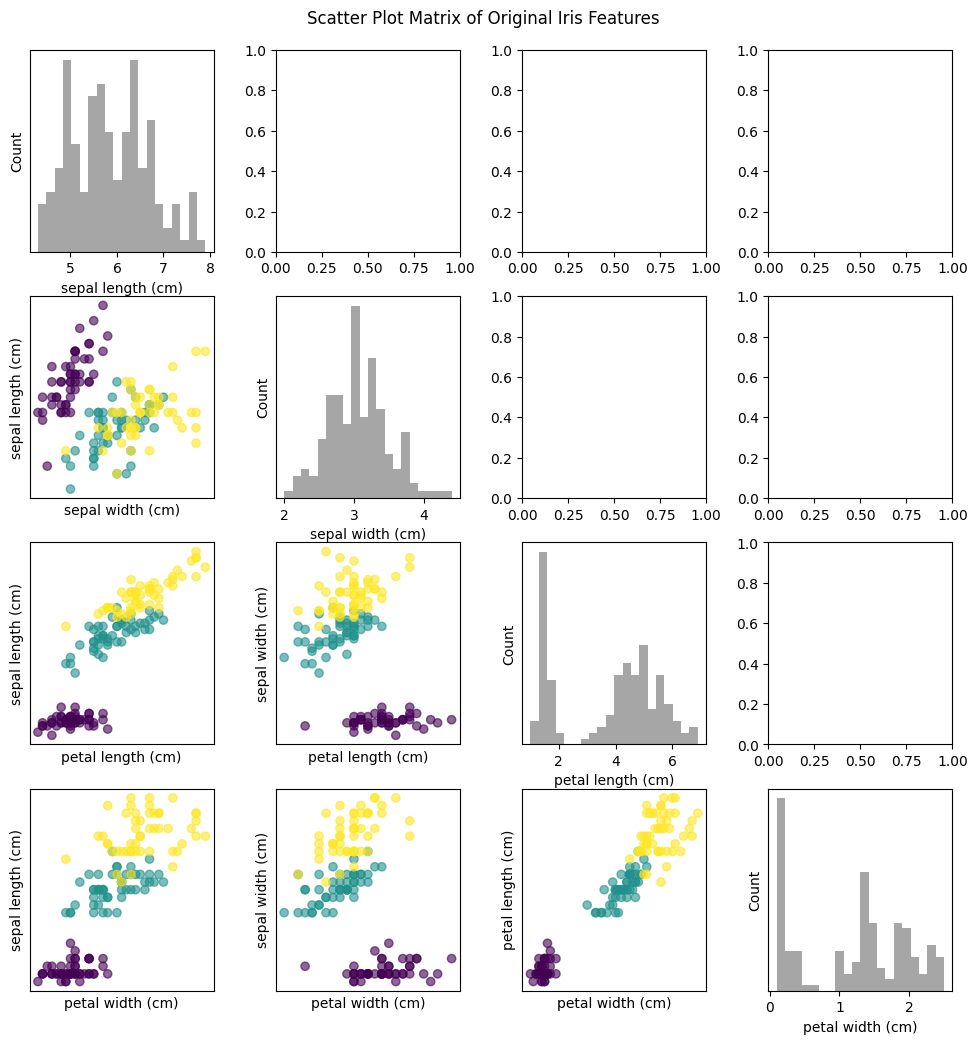

In [12]:
n_features = X.shape[1]
fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(10, 10))
fig.tight_layout()

names = feature_names #

for i, j, in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, i], X[:, j], c=y, cmap='viridis', alpha=0.6)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[j, i].set_xticks([])
    ax[j, i].set_yticks([])

for i in range(n_features):
    ax[i, i].hist(X[:, i], bins=20, color='gray', alpha=0.7)
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])
    ax[i, i].set_yticks([])

fig.suptitle('Scatter Plot Matrix of Original Iris Features', y=1.02)

plt.show()

Dari visualisasi data singkat diatas, kondisi data saat ini masih berada dalam bentuk fitur asli yang berdimensi 4. Terdapat informasi redundan karena beberapa fitur berkorelasi tinggi. Inilah alasan mengapa PCA digunakan, yaitu untuk mereduksi dimensi data dengan tetap mempertahankan variasi terbesar dan membuang informasi yang tumpang tindih.

# Standarisasi dataset sebelum dilakukan PCA

In [7]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print("\nShape of standardized data:", X_std.shape)
print(X_std[:5])


Shape of standardized data: (150, 4)
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


Setiap fitur dalam data X diubah agar memiliki rata-rata nol dan standar deviasi satu. Ini penting karena PCA sangat sensitif terhadap skala fitur—fitur dengan skala besar bisa mendominasi hasil jika tidak distandarkan terlebih dahulu.

# Algoritma PCA menggunakan scikit-learn

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
print(f"\nExplained variance ratio by first {pca.n_components} components:", pca.explained_variance_ratio_)
print(f"Total explained variance captured by {pca.n_components} components:", sum(pca.explained_variance_ratio_))



Explained variance ratio by first 2 components: [0.72962445 0.22850762]
Total explained variance captured by 2 components: 0.9581320720000166


Setelah distandarkan, PCA diterapkan untuk mereduksi dimensi data dari 4 fitur menjadi hanya 2 komponen utama (principal components). Artinya, seluruh data X_std direpresentasikan ulang dalam ruang 2 dimensi yang menangkap sebanyak mungkin variasi dari data asli.

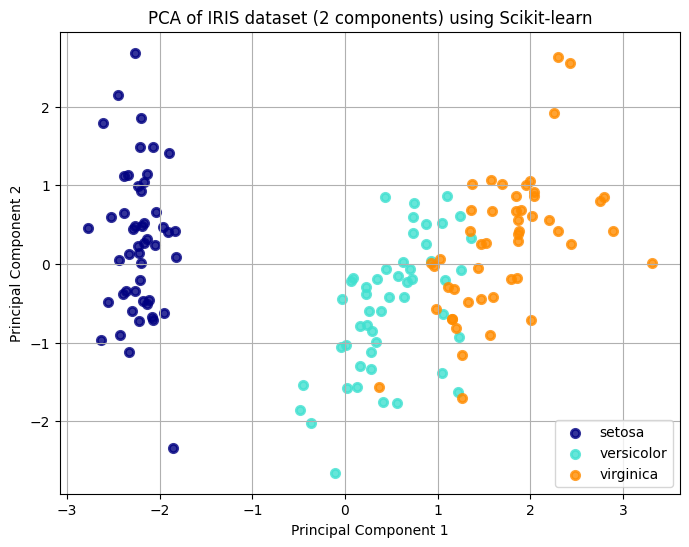

In [9]:
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset (2 components) using Scikit-learn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Setelah dilakukan PCA terhadap dataset Iris, data yang semula berdimensi empat berhasil direduksi menjadi dua dimensi utama tanpa kehilangan banyak informasi penting. Hasil visualisasi menunjukkan bahwa kelas *setosa* terpisah sangat jelas dari dua kelas lainnya, menandakan bahwa karakteristik fiturnya sangat berbeda. Sementara itu, kelas *versicolor* dan *virginica* masih tampak saling tumpang tindih, mengindikasikan bahwa keduanya memiliki kemiripan dalam pola fitur. Secara keseluruhan, PCA berhasil menyederhanakan data dan mengungkap struktur yang mendasari perbedaan antar spesies bunga, sekaligus mempermudah proses analisis dan visualisasi.


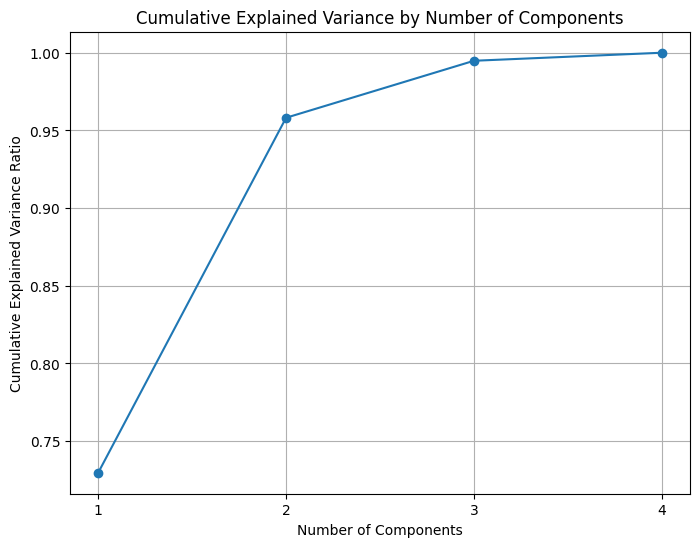

In [10]:
pca_full = PCA()
pca_full.fit(X_std)
explained_variance_full = pca_full.explained_variance_ratio_
cum_explained_variance_full = np.cumsum(explained_variance_full)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance_full) + 1), cum_explained_variance_full, '-o')
plt.xticks(np.arange(1, len(explained_variance_full) + 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio');
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

Grafik tersebut menunjukkan **cumulative explained variance ratio** terhadap jumlah komponen utama (principal components) pada PCA. Artinya, grafik ini menggambarkan seberapa banyak **variasi total dalam data asli** yang dapat dijelaskan jika kita menggunakan sejumlah komponen tertentu. Dari grafik terlihat bahwa hanya dengan **2 komponen pertama**, PCA sudah mampu menjelaskan sekitar **95% lebih dari total variasi data**, dan dengan 3 komponen hampir mencapai 100%. Hal ini menunjukkan bahwa sebagian besar informasi penting dalam data dapat direpresentasikan hanya dengan 2 atau 3 komponen, sehingga PCA sangat efektif untuk mereduksi dimensi data tanpa kehilangan banyak informasi.
